In [1]:
import numpy as np
import astropy.coordinates as coord
from astropy.cosmology import FlatLambdaCDM
from astropy.table import Table
import scipy.stats as stats
import scipy.integrate as integrate
import matplotlib.pyplot as plt

In [2]:
# reference cosmology
cosmo = FlatLambdaCDM(H0=50, Om0=0.3)

# cluster names
clusters = ['A2029','A0478','PKS0745','A2204','M2129','A1835','M2140','M1931','M1115','M1532','M1720',
            'M0429','M1347','M1423']

# best-fit scaling factor values (unlogged, commonly blinded)
s_obs = [1.2635901, 1.2285727, 1.4000466, 0.90895700, 1.1479442, 1.0707163, 1.0416174, 0.92511159, 1.2250605, 
         1.3000808, 1.1407545, 0.93993878, 1.1322540, 1.1051780]
#s_obs = [1.3675833, 1.5004276, 1.6536793, 1.1365377, 1.4255445, 1.2625648, 1.1749419, 1.0554847, 1.4673408, 
#         1.5586258, 1.4176997, 1.0326066, 1.4567769, 1.0158851]

#[1.3095797, 1.2732879, 1.4510027, 0.94203943, 1.1897248, 1.1096861, 1.0795281, 0.95878196, 1.2696478, 
#         1.3473985, 1.1822734, 0.97414881, 1.1734636, 1.1454021]

s_obs = np.log(s_obs)

# noncentral t distribution fit parameters: [df, nc, mu, stdev]
nct_params = [[339.96969188490175, 0.06616263479796017, -0.004447447060926816, 0.05369804346441508], 
              [339.9677300959767, 0.15583229112323133, -0.005993106836419702, 0.06599045881109597], 
              [16.79428117457301, -3.8729871269617533, 0.22761622082219968, 0.05923606466843334], 
              [4.162643626728423, 1.05631824365792, -0.041019585895911426, 0.03699880262442781], 
              [3.9406191805440303, 0.824600437697138, -0.06166626276133451, 0.075578987069924], 
              [4.085627830860457, 0.3377373904027432, -0.020805592774094942, 0.058726853399541826], 
              [2.0609861668126666, 0.2556688801840838, -0.01568437246026323, 0.0532992327086082], 
              [3.819961983632313, 0.573981234239659, -0.03568131032022755, 0.06581754797457146], 
              [4.484328415003851, 0.7484325510501272, -0.05796515922808439, 0.07572880436138119], 
              [4.04245236078791, 0.44953635537942555, -0.025199309223284998, 0.07203314424861632], 
              [9.036739173082566, 0.3645667158145911, -0.03949959286238942, 0.15061549693715665], 
              [4.9427441737149955, 0.4505366524421171, -0.05648707942149145, 0.1238774851707656], 
              [13.22276653143344, 0.3186549496716175, -0.014708392875676188, 0.047795614730184094], 
              [3.3878453881020336, 1.1532811478450309, -0.06909371678043572, 0.05860646544243045]]

#[[339.9697144637528, 0.06616248336209467, -0.0044475772405066505, 0.05369815452916181], 
#              [339.9677847565298, 0.15583214381260196, -0.005992892513107119, 0.06599039295678841], 
#              [16.794227604155047, -3.8729867008706913, 0.22761601734581532, 0.059236017392639215], 
#              [4.162643626728423, 1.056318278374208, -0.041019585895911426, 0.03699880262442781], 
#              [3.9406191805440303, 0.8246004167793245, -0.06166626276133451, 0.075578987069924], 
#              [4.085627830860457, 0.33773730024148957, -0.020805592774094942, 0.058726853399541826], 
#              [2.061024999827053, 0.2556688723659983, -0.015683342123768595, 0.05329954643195252], 
#              [3.819961983632313, 0.5739812137485897, -0.03568131032022755, 0.06581754797457146], 
#              [4.484328415003851, 0.7484325215093627, -0.05796515922808439, 0.07572880436138119], 
#              [4.04245236078791, 0.44953630344963735, -0.025199309223284998, 0.07203314424861632], 
#              [9.036739173082566, 0.3645667692045598, -0.03949959286238942, 0.15061549693715665], 
#              [4.9427441737149955, 0.45053666878255366, -0.05648707942149145, 0.1238774851707656], 
#              [13.222764344264583, 0.31865499233791517, -0.014708396523769783, 0.04779561489824427], 
#              [3.38779364694798, 1.153281078715385, -0.06909232572949348, 0.058605570827530665]]

#[[339.97817804680085, 0.06087139515651931, -0.0034014828840036064, 0.05435925740506619],
#              [23.723770107261636, 0.2340453894798166, -0.01175571060850462, 0.06604694581446068], 
#              [339.97260543050004, 0.3429185523997359, -0.036197398923190585, 0.07470922621598847], 
#              [4.659014007306532, 0.9483740813355502, -0.03923595267742777, 0.03730616486498557], 
#              [3.195585997116604, 1.3257136358933381, -0.09238630688923818, 0.06515751506251646], 
#              [3.8893372099565604, 0.3739324856532939, -0.02254207991350598, 0.059262063847985935],
#              [2.0611785554349686, 0.41486493261918694, -0.023568539107443602, 0.052374573079238394],
#              [4.15011414428196, 0.6388760345349248, -0.042179961829777415, 0.06204016890699515], 
#              [5.299734759467605, 0.543657362467623, -0.04107934140746494, 0.08283401102388682], 
#              [4.3846120965123205, 0.5345198861739066, -0.03460736007200782, 0.07680869505769042],
#              [6.352091900631952, 0.3954020544795493, -0.0522213207570137, 0.13606142842482888], 
#              [6.0660696398555505, 0.5484142853774064, -0.06452697030403093, 0.12149572482553175], 
#              [13.939880076429272, 0.285079441918303, -0.01158380005372851, 0.049224507637960685], 
#              [2.511747841279664, 0.7561750672544485, -0.04469811079823298, 0.05564965981890392]]

# cluster redshifts
redshift = [0.078000002, 0.088, 0.103, 0.152, 0.235, 0.252, 0.31299999, 0.352, 0.35499999, 0.36300001, 0.391, 
            0.39899999, 0.45100001, 0.54299998]

# reference distance
d_ref = coord.Distance(z=redshift, cosmology=cosmo)

# slope/intercept from the linear fits of kT variation vs. best-fit scaling factor
kt_scale = [0.8967904548378033, 0.8606934210806869, 0.9326003020108651, 0.8499260720688757, 0.9877716649839489, 
            0.9340233365976645, 0.7892516312487842, 0.8545187631985314, 0.932222220220598, 0.928496746458922, 
            0.8896075747722327, 0.9638683286144264, 0.7631618273313902, 0.7187961097699559]

In [3]:
#df = []
#nc = []
#mu = []
#std = []
#for i in range(0, 14):
#    df.append(nct_params[i][0])
#    nc.append(nct_params[i][1])
#    mu.append(nct_params[i][2])
#    std.append(nct_params[i][3])
    
#t = Table((clusters, s_obs, df, nc, mu, std, redshift, d_ref, kt_scale), 
#          names=('clusters', 's_obs', 'df', 'nc', 'mu', 'std', 'redshift', 'd_ref', 'kt_scale'))
#print(t)
#t.write('unblinded_data_for_likelihood_final.dat', format='ascii', overwrite=True)

In [4]:
data = Table.read('actual_data_for_likelihood_1000.dat', format='ascii')

In [5]:
def likelihood(clusters, s_obs, z, nct_params, d_ref, kt_scale, H0, intr_scatter, kt_bias, f_bias):
    
    '''
    Takes in: 
    DATA - arrays of cluster names, best-fit scaling factors, redshifts, nct fit parameters, reference
    cosmology, kT scaling factors
    MODEL PARAMETERS - floats H0, intrinsic scatter (encompasses fit scatter), kT bias, overall fit bias + flux bias
    
    Computes:
    For each cluster, the likelihood that the observed scaling factor corresponds to a cosmology with a Hubble 
    constant of H0 (w/ other given model parameters)
    
    Returns:
    Sum of the log-likelihood of all clusters
    '''
    
    total_likelihood = 0
    
    # Trial cosmology using input H0
    trial_cosmo = FlatLambdaCDM(H0=H0, Om0=0.3) 
    
    #for i in range(8, 9):
    for i in range(0, 14):

        # Compute d(z) according to trial cosmology
        dz = coord.Distance(z=z[i], cosmology=trial_cosmo)
        
        # Mean scaling factor, adjusted for the X-ray kT & flux calibration, as well as the overall fit bias
        # f_bias is added in log space because we have some nominal value for the overall fit bias in log units so...
        s_mean = np.log(np.sqrt(d_ref[i]/dz) * (1 + kt_scale[i] * kt_bias)) + f_bias
        
        # The actual likelihood is an integral over s_true of P(s_obs|s_true)P(s_true|s_mean, sigma)
        # Basically, just do a right Riemann sum over s_true
        
        likelihood = 0 
        
        # Calculate the 0.1 and 99.9 percentile values of the normal & nct distributions
        x_left_nct = s_obs[i] - stats.nct.ppf(0.999, nct_params[0][i], nct_params[1][i], 
                                      loc=nct_params[2][i], scale=nct_params[3][i])
        x_right_nct = s_obs[i] - stats.nct.ppf(0.001, nct_params[0][i], nct_params[1][i], 
                                      loc=nct_params[2][i], scale=nct_params[3][i])
        x_left_norm = stats.norm.ppf(0.001, s_mean, intr_scatter)
        x_right_norm = stats.norm.ppf(0.999, s_mean, intr_scatter)
        
        # Lower bound of integral is the smaller of the 0.1 percentile values between the normal & nct dist
        # Upper bound of integral is the larger of the 99.9 percentile values
        # Spacing is 1% of the smaller of the stdev of the nct distribution vs. normal distribution
        dx = np.amin([nct_params[3][i], intr_scatter]) * 0.01
        x = np.arange(np.amax([x_left_nct, x_left_norm]), np.amin([x_right_nct, x_right_norm]), dx)

        # Right Riemann sum
        # P(s_obs|s_true): nct distribution given by fits to the noise realizations
        # P(s_true|s_mean, sigma): log-normal intrinsic scatter distribution
        s_true = x
        likelihood = np.sum(dx * stats.norm.pdf(s_true[0:], loc=s_mean, scale=intr_scatter) * 
                            stats.nct.pdf(s_obs[i] - s_true[0:], nct_params[0][i], nct_params[1][i], 
                                          loc=nct_params[2][i], scale=nct_params[3][i]))
        #likelihood = stats.nct.pdf(s_obs[i] - s_mean, nct_params[0][i], nct_params[1][i], 
        #                           loc=nct_params[2][i], scale=nct_params[3][i])
        #stats.norm.pdf(s_obs[i], loc=s_mean, scale=intr_scatter)
        
        #plt.plot(x[0:], dx * stats.norm.pdf(s_true[0:], s_mean, intr_scatter) * 
        #         stats.nct.pdf(s_obs[i] - s_true[0:], nct_params[0][i], nct_params[1][i], loc=nct_params[2][i], 
        #                       scale=nct_params[3][i]), linestyle='', marker='o', markersize=2, color='C'+str(i))
        
        # Sum the log-likelihood of each cluster for the final result
        total_likelihood += np.log(likelihood)

    #plt.show()
    
    return(total_likelihood)

In [13]:
likelihood(data['clusters'], data['s_obs'], data['redshift'], [data['df'], data['nc'], data['mu'], data['std']], 
           d_ref, data['kt_scale'], 90, 0.1, 0.09, 0.024)

5.875816814170842

In [260]:
def likelihood(clusters, s_obs, z, nct_params, d_ref, kt_scale, H0, intr_scatter, kt_bias, f_bias, fit_bias):
    
    '''
    Takes in: 
    DATA - arrays of cluster names, best-fit scaling factors, redshifts, nct fit parameters, reference
    cosmology, kT scaling factors
    MODEL PARAMETERS - floats H0, intrinsic scatter (encompasses fit scatter), kT bias, flux bias, overall fit bias
    
    Computes:
    For each cluster, the likelihood that the observed scaling factor corresponds to a cosmology with a Hubble 
    constant of H0 (w/ other given model parameters)
    
    Returns:
    Sum of the log-likelihood of all clusters
    '''
    
    total_likelihood = 0
    trial_cosmo = FlatLambdaCDM(H0=H0, Om0=0.3) # trial cosmology using input H0
    
    for i in range(0, 14):

        dz = coord.Distance(z=z[i], cosmology=trial_cosmo) # compute d(z) according to trial cosmology
        
        # Mean scaling factor, adjusted for the X-ray kT & flux calibration, as well as the overall fit bias
        # This should maybe be scaled by the overall blinding factor?
        s_mean = np.log(np.sqrt(d_ref[i]/dz) * (1 + kt_scale[i] * kt_bias) * (1 + f_bias)) + fit_bias
        
        # The actual likelihood is an integral over s_true of P(s_obs|s_true)P(s_true|s_mean, sigma)
        # For our purposes, sufficient to approximate as a midpoint Riemann sum over s_true
        
        likelihood = 0 
        x = np.linspace(-3, 3, 1000) # range of s_true's for the sum (is +/-10 far out enough?)

        integrand=[]
        x_list=[]
        
        for j in range(1, 1000):
            
            # s_true ("true" scaling factor) for which the probabilities are computed
            s_true = x[j]
            
            # P(s_true|s_mean, sigma)
            # Intrinsic scatter distribution
            normal = stats.norm(s_mean, intr_scatter).pdf(s_true)
            
            # P(s_obs|s_true)
            # Probability distribution given by fits to the noise realizations
            nct = stats.nct(nct_params[0][i], nct_params[1][i], loc=nct_params[2][i], 
                               scale=nct_params[3][i]).pdf(s_obs[i] - s_true)
            
            integrand.append((normal * nct) * (x[j] - x[j-1]))
            x_list.append(x[j-1])
            
            # area of the rectangle
            likelihood += (normal * nct) * (x[j] - x[j-1])
        #print(likelihood)
        plt.plot(x_list, integrand, linestyle='', marker='o', markersize=2, color='C'+str(i))
        total_likelihood += np.log(likelihood) # sum the log-likelihood of each cluster for the final result
        
    return(total_likelihood)

0.0


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in log


1.3660517279743964e-15
8.175748689042014e-142
2.280769948800885e-05
0.0009336817267166439
8.402268917681713e-05
0.0026458624979637407
0.000241074469670479
3.3920057939551486e-05
7.269290166577552e-05
0.000192309357135054
0.0003157107193942608
7.585864312412597e-12
0.0020619881767755073


-inf

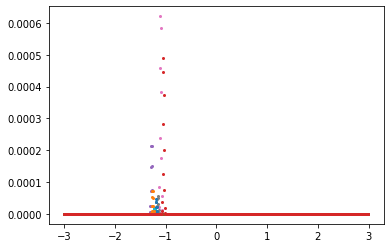

In [262]:
likelihood(data['clusters'], data['s_obs'], data['redshift'], [data['df'], data['nc'], data['mu'], data['std']], 
           d_ref, data['kt_scale'], 20, 0.01, -0.5, 0.01, 0.024)